<a href="https://colab.research.google.com/github/renu0071989/ML-project1/blob/main/AIR_TICKET_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',50)

In [ ]:
df =  pd.read_excel('Data_Train (1).xlsx')

In [ ]:
df.head(10)

Airline Date_of_Journey    Source Destination  \
0             IndiGo      24/03/2019  Banglore   New Delhi   
1          Air India       1/05/2019   Kolkata    Banglore   
2        Jet Airways       9/06/2019     Delhi      Cochin   
3             IndiGo      12/05/2019   Kolkata    Banglore   
4             IndiGo      01/03/2019  Banglore   New Delhi   
5           SpiceJet      24/06/2019   Kolkata    Banglore   
6        Jet Airways      12/03/2019  Banglore   New Delhi   
7        Jet Airways      01/03/2019  Banglore   New Delhi   
8        Jet Airways      12/03/2019  Banglore   New Delhi   
9  Multiple carriers      27/05/2019     Delhi      Cochin   

                   Route Dep_Time  Arrival_Time Duration Total_Stops  \
0              BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1  CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2  DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h     2 stops   
3        CCU → NAG → BLR    18:05         23:30   5h 25m      1 stop   
4        BLR → NAG → DEL    16:50         21:35   4h 45m      1 stop   
5              CCU → BLR    09:00         11:25   2h 25m    non-stop   
6        BLR → BOM → DEL    18:55  10:25 13 Mar  15h 30m      1 stop   
7        BLR → BOM → DEL    08:00  05:05 02 Mar   21h 5m      1 stop   
8        BLR → BOM → DEL    08:55  10:25 13 Mar  25h 30m      1 stop   
9        DEL → BOM → COK    11:25         19:15   7h 50m      1 stop   

               Additional_Info  Price  
0                        Null    3897  
1                         Null   7662  
2                         Null  13882  
3                         Null   6218  
4                         Null  13302  
5                         Null   3873  
6  In-flight meal not included  11087  
7                         Null  22270  
8  In-flight meal not included  11087  
9                         Null   8625

In [ ]:
## getting general information regarding dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
##  number of unique values in each column/feature:
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [ ]:
## duplicates in dataset
df.duplicated().sum()

220

In [ ]:
## Statistical Information
df.describe(include = ['O']).T

count unique              top  freq
Airline          10683     12      Jet Airways  3849
Date_of_Journey  10683     44       18/05/2019   504
Source           10683      5            Delhi  4537
Destination      10683      6           Cochin  4537
Route            10682    128  DEL → BOM → COK  2376
Dep_Time         10683    222            18:55   233
Arrival_Time     10683   1343            19:00   423
Duration         10683    368           2h 50m   550
Total_Stops      10682      5           1 stop  5625
Additional_Info  10683     10             Null  8347

In [ ]:
df.describe()

Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000

In [ ]:
## checking null values
df.isnull().sum().sort_values(ascending = False)

Route              1
Total_Stops        1
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Additional_Info    0
Price              0
dtype: int64

In [ ]:
for i in df.columns:
    print(f'The unique values in feature {i} is:',df[i].unique(),sep = '\n')

The unique values in feature Airline is:
['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
The unique values in feature Date_of_Journey is:
['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
The unique values in feature Source is:
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
The unique values in feature Destination is:
['New Delhi' 'Ba

In [ ]:
for i in df.columns:
    print(f"The value counts for each value in {i} column is/are :  \n{df[i].value_counts()}")
    print('---------------------------------------------------------------------------------------')

The value counts for each value in Airline column is/are :  
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
---------------------------------------------------------------------------------------
The value counts for each value in Date_of_Journey column is/are :  
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    32

In [ ]:
## Checking Feature:Additional Info
df["Additional_Info"].unique()

array(['Null ', 'Null', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [ ]:
## percentage of null values in additional_info
factor = len(df[(df["Additional_Info"]=='Null')|(df["Additional_Info"]=='Null ')])/len(df["Additional_Info"])
percentage_null_values = factor*100
percentage_null_values
## later we can drop this column as percentage is over 75%, hence information extracted is less.

78.14284377047646

## Feature Engineering

In [ ]:
def preprocess(data):
    '''Function preprocesses the data and make it model ready. Simply push dataframe in the function.
    !!! Use only after treating null values or when null values are less enough to drop. It returns two dataframes,
    one for eda and one for model.'''
    
    data.dropna(inplace = True)
    
    df.drop_duplicates(inplace = True)
    
    data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'])
    data['day']=pd.DatetimeIndex(data['Date_of_Journey']).day
    data['month']=pd.DatetimeIndex(data['Date_of_Journey']).month
    data['year']=pd.DatetimeIndex(data['Date_of_Journey']).year
    data['weekday'] = pd.DatetimeIndex(data['Date_of_Journey']).weekday
    
    data['Total_Stops'] = data['Total_Stops'].str.replace('non-stop','0')
    data['Total_Stops'] = data['Total_Stops'].str.replace('stops','')
    data['Total_Stops'] = data['Total_Stops'].str.replace('stop','')
    data['Total_Stops'] = data['Total_Stops'].astype(int)
    
    data['Destination'] = np.where(data['Destination']=='New Delhi',"Delhi",data['Destination'])
    data['Airline'] = np.where(data['Airline']=='Jet Airways Business',"Jet Airways",data['Airline'])
    
    Arrival_Time = []
    for i in data['Arrival_Time']:
        Arrival_Time.append(i[:5])
    data['Arrival_Time'] = Arrival_Time
    data['Arrival_Time_Hour'] = pd.DatetimeIndex(data['Arrival_Time']).hour
    data['Arrival_Time_Minutes'] = pd.DatetimeIndex(data['Arrival_Time']).minute
    
    data['Dep_Time_Hour'] = pd.DatetimeIndex(data['Dep_Time']).hour
    data['Dep_Time_Minute'] = pd.DatetimeIndex(data['Dep_Time']).minute
    
    data["Duration_Total_Hour"] = data["Duration"].str.replace("h", '*1').str.replace(' ', '+').str.replace('m', '/60').apply(eval)
    
    data1 = pd.get_dummies(data, prefix=['Airline', 'Source', 'Destination'], columns=['Airline', 'Source','Destination'],drop_first = False)
    
    data1.drop(['Date_of_Journey','Dep_Time','Arrival_Time','Duration','Additional_Info','year'],axis = 1,inplace = True)
    return data,data1

In [ ]:
data,data_model = preprocess(df)

In [ ]:
data

Airline Date_of_Journey    Source Destination  \
0           IndiGo      2019-03-24  Banglore       Delhi   
1        Air India      2019-01-05   Kolkata    Banglore   
2      Jet Airways      2019-09-06     Delhi      Cochin   
3           IndiGo      2019-12-05   Kolkata    Banglore   
4           IndiGo      2019-01-03  Banglore       Delhi   
...            ...             ...       ...         ...   
10678     Air Asia      2019-09-04   Kolkata    Banglore   
10679    Air India      2019-04-27   Kolkata    Banglore   
10680  Jet Airways      2019-04-27  Banglore       Delhi   
10681      Vistara      2019-01-03  Banglore       Delhi   
10682    Air India      2019-09-05     Delhi      Cochin   

                       Route Dep_Time Arrival_Time Duration  Total_Stops  \
0                  BLR → DEL    22:20        01:10   2h 50m            0   
1      CCU → IXR → BBI → BLR    05:50        13:15   7h 25m            2   
2      DEL → LKO → BOM → COK    09:25        04:25      19h            2   
3            CCU → NAG → BLR    18:05        23:30   5h 25m            1   
4            BLR → NAG → DEL    16:50        21:35   4h 45m            1   
...                      ...      ...          ...      ...          ...   
10678              CCU → BLR    19:55        22:25   2h 30m            0   
10679              CCU → BLR    20:45        23:20   2h 35m            0   
10680              BLR → DEL    08:20        11:20       3h            0   
10681              BLR → DEL    11:30        14:10   2h 40m            0   
10682  DEL → GOI → BOM → COK    10:55        19:15   8h 20m            2   

      Additional_Info  Price  day  month  year  weekday  Arrival_Time_Hour  \
0               Null    3897   24      3  2019        6                  1   
1                Null   7662    5      1  2019        5                 13   
2                Null  13882    6      9  2019        4                  4   
3                Null   6218    5     12  2019        3                 23   
4                Null  13302    3      1  2019        3                 21   
...               ...    ...  ...    ...   ...      ...                ...   
10678            Null   4107    4      9  2019        2                 22   
10679            Null   4145   27      4  2019        5                 23   
10680            Null   7229   27      4  2019        5                 11   
10681            Null  12648    3      1  2019        3                 14   
10682            Null  11753    5      9  2019        3                 19   

       Arrival_Time_Minutes  Dep_Time_Hour  Dep_Time_Minute  \
0                        10             22               20   
1                        15              5               50   
2                        25              9               25   
3                        30             18                5   
4                        35             16               50   
...                     ...            ...              ...   
10678                    25             19               55   
10679                    20             20               45   
10680                    20              8               20   
10681                    10             11               30   
10682                    15             10               55   

       Duration_Total_Hour  
0                 2.833333  
1                 7.416667  
2                19.000000  
3                 5.416667  
4                 4.750000  
...                    ...  
10678             2.500000  
10679             2.583333  
10680             3.000000  
10681             2.666667  
10682             8.333333  

[10462 rows x 20 columns]

In [ ]:
data_model

Route  Total_Stops  Price  day  month  weekday  \
0                  BLR → DEL            0   3897   24      3        6   
1      CCU → IXR → BBI → BLR            2   7662    5      1        5   
2      DEL → LKO → BOM → COK            2  13882    6      9        4   
3            CCU → NAG → BLR            1   6218    5     12        3   
4            BLR → NAG → DEL            1  13302    3      1        3   
...                      ...          ...    ...  ...    ...      ...   
10678              CCU → BLR            0   4107    4      9        2   
10679              CCU → BLR            0   4145   27      4        5   
10680              BLR → DEL            0   7229   27      4        5   
10681              BLR → DEL            0  12648    3      1        3   
10682  DEL → GOI → BOM → COK            2  11753    5      9        3   

       Arrival_Time_Hour  Arrival_Time_Minutes  Dep_Time_Hour  \
0                      1                    10             22   
1                     13                    15              5   
2                      4                    25              9   
3                     23                    30             18   
4                     21                    35             16   
...                  ...                   ...            ...   
10678                 22                    25             19   
10679                 23                    20             20   
10680                 11                    20              8   
10681                 14                    10             11   
10682                 19                    15             10   

       Dep_Time_Minute  Duration_Total_Hour  Airline_Air Asia  \
0                   20             2.833333                 0   
1                   50             7.416667                 0   
2                   25            19.000000                 0   
3                    5             5.416667                 0   
4                   50             4.750000                 0   
...                ...                  ...               ...   
10678               55             2.500000                 1   
10679               45             2.583333                 0   
10680               20             3.000000                 0   
10681               30             2.666667                 0   
10682               55             8.333333                 0   

       Airline_Air India  Airline_GoAir  Airline_IndiGo  Airline_Jet Airways  \
0                      0              0               1                    0   
1                      1              0               0                    0   
2                      0              0               0                    1   
3                      0              0               1                    0   
4                      0              0               1                    0   
...                  ...            ...             ...                  ...   
10678                  0              0               0                    0   
10679                  1              0               0                    0   
10680                  0              0               0                    1   
10681                  0              0               0                    0   
10682                  1              0               0                    0   

       Airline_Multiple carriers  Airline_Multiple carriers Premium economy  \
0                              0                                          0   
1                              0                                          0   
2                              0                                          0   
3                              0                                          0   
4                              0                                          0   
...                          ...                                        ...   
10678                          0                                      

In [ ]:
from pandas_profiling import ProfileReport
report = ProfileReport(data)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# EDA

## Univariate Analysis

In [ ]:
plt.figure(figsize=(30,10))
plt.xticks(rotation = 45,fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(xlabel = 'Airline', fontsize = 30)
sns.countplot(df['Airline'])

<AxesSubplot:xlabel='Airline', ylabel='count'>

<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

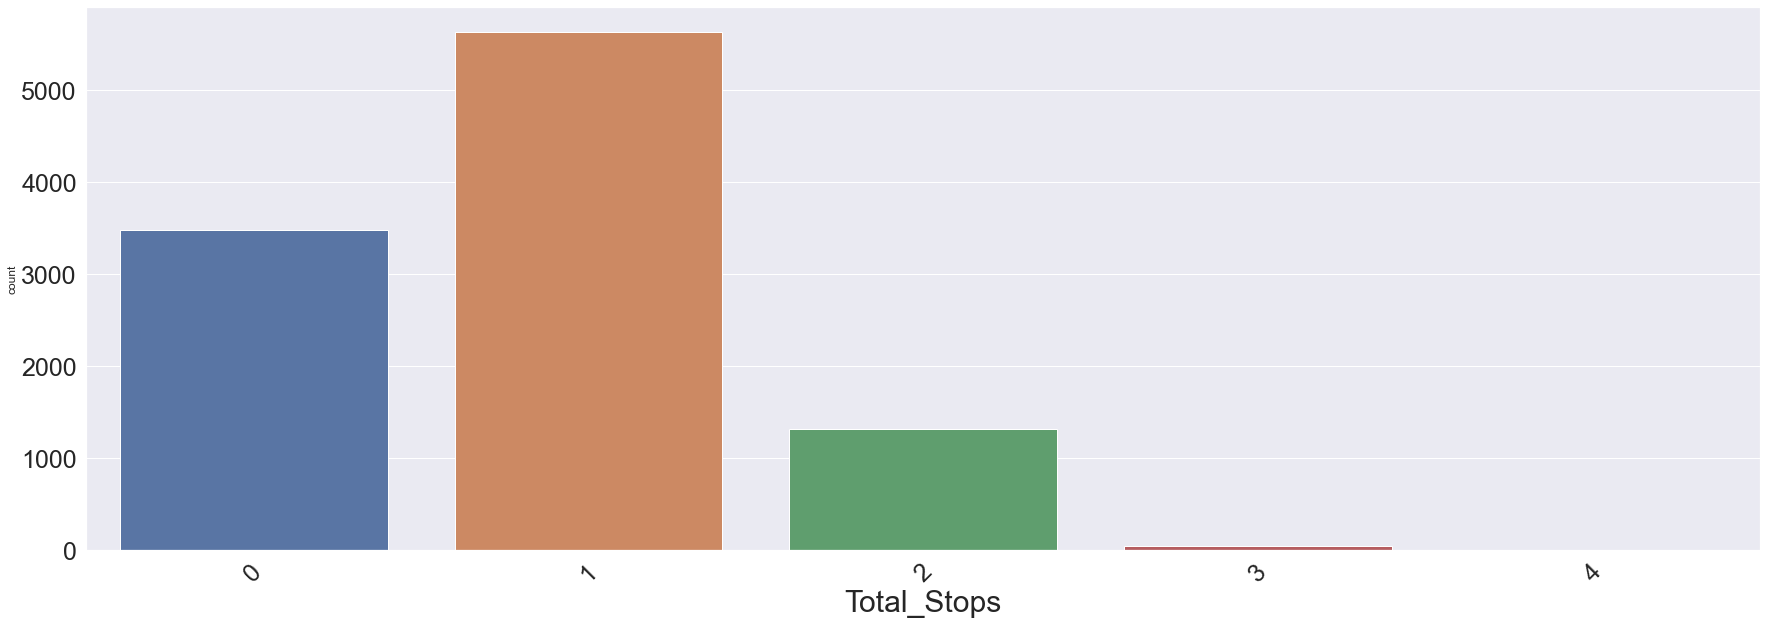

In [ ]:
plt.figure(figsize=(30,10))
plt.xticks(rotation = 45,fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(xlabel = 'Total_Stops', fontsize = 30)
sns.countplot(data['Total_Stops'])

<AxesSubplot:xlabel='Source', ylabel='count'>

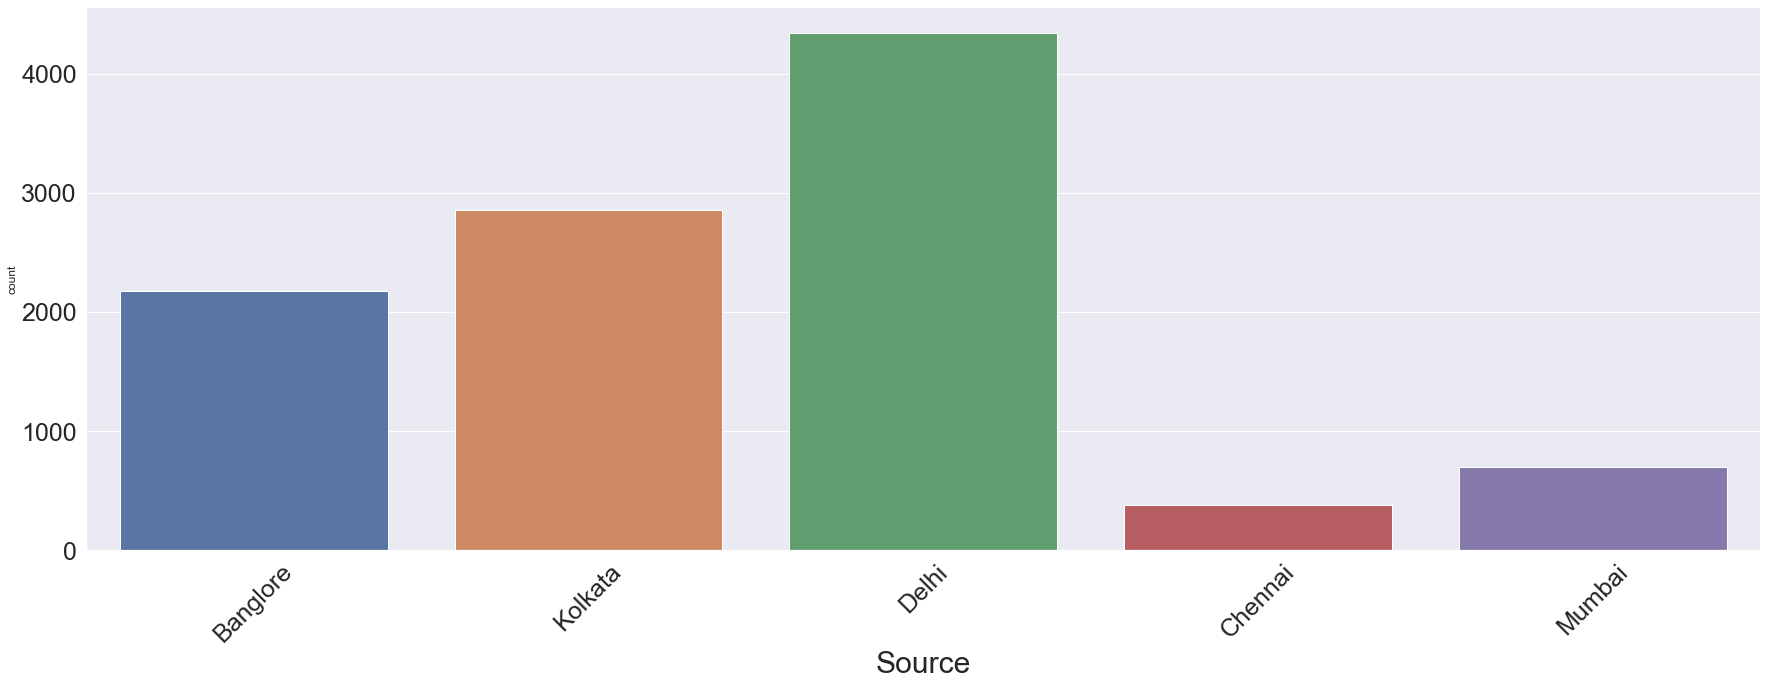

In [ ]:
plt.figure(figsize=(30,10))
plt.xticks(rotation = 45,fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(xlabel = 'Source', fontsize = 30)
sns.countplot(df['Source'])

<AxesSubplot:xlabel='Destination', ylabel='count'>

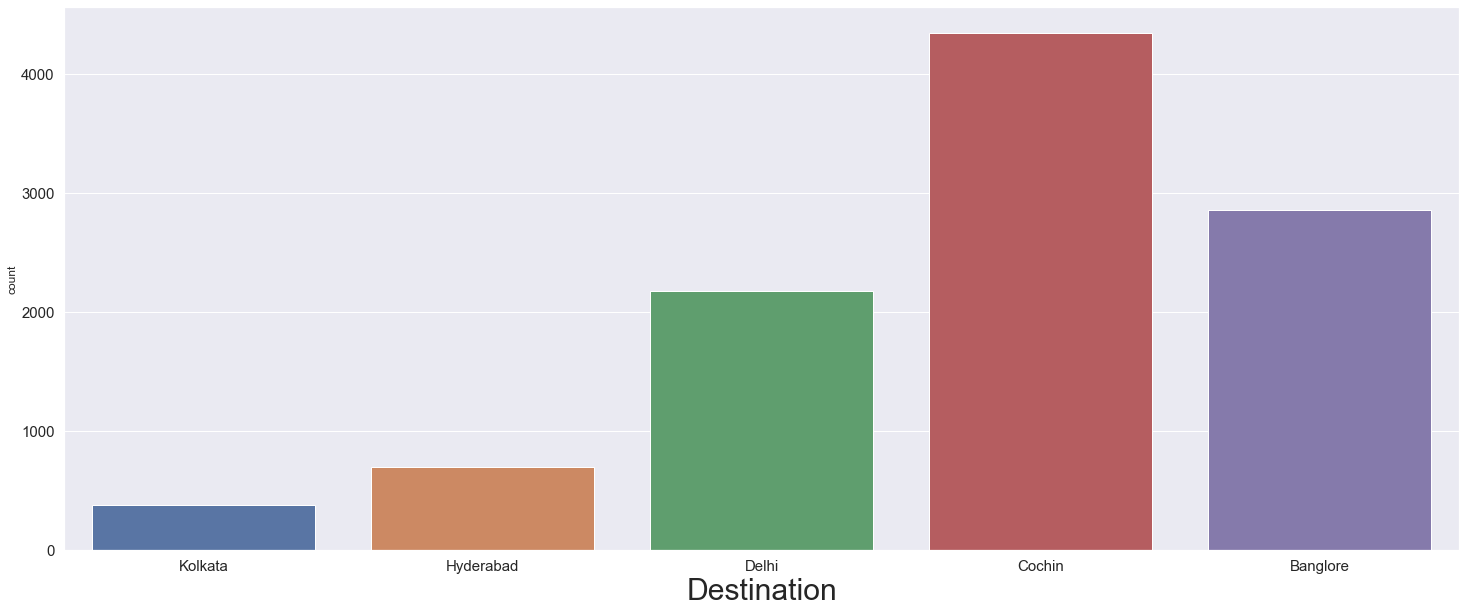

In [ ]:
plt.figure(figsize=(25,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(xlabel = 'Destination', fontsize = 30)
sns.countplot(df['Destination'].sort_values(ascending = False))

<AxesSubplot:xlabel='Dep_Time_Hour', ylabel='count'>

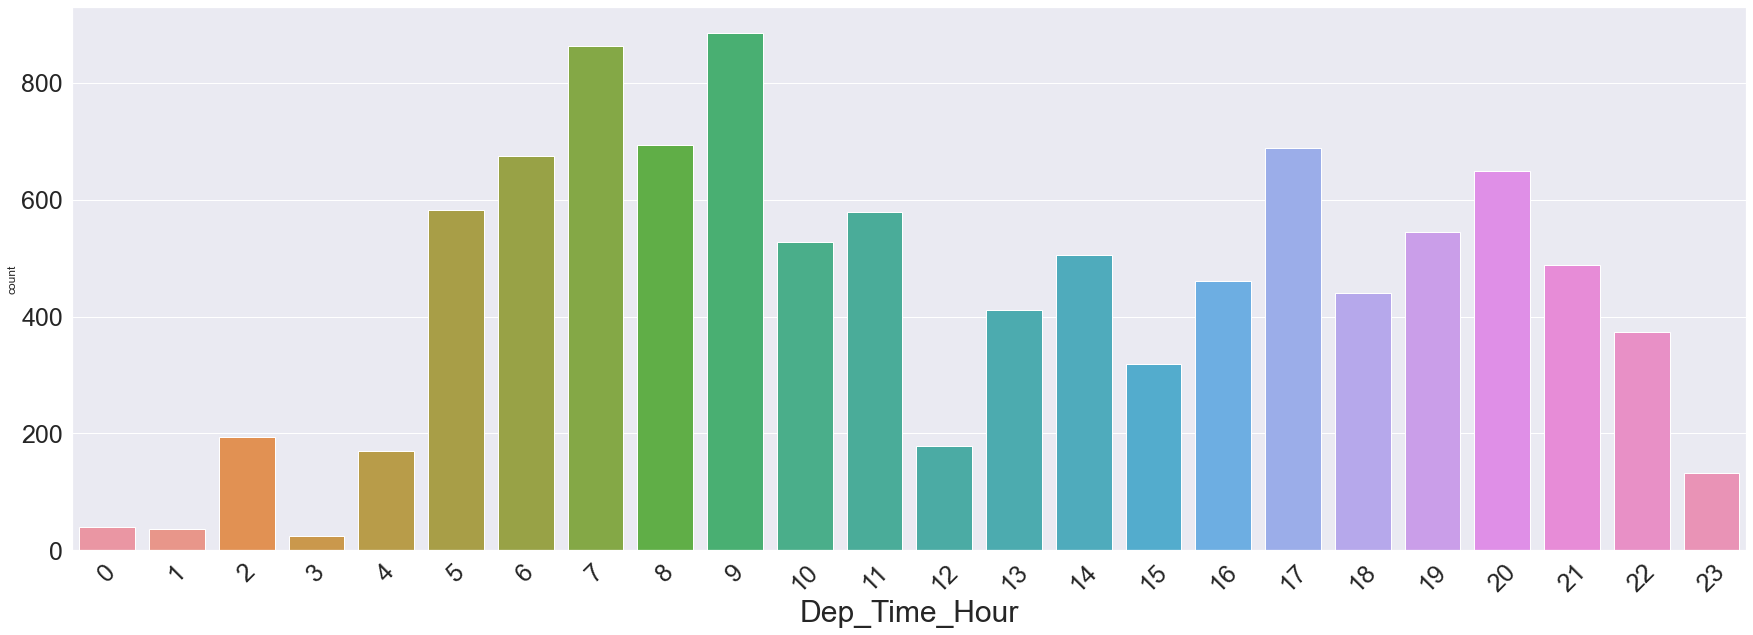

In [ ]:
plt.figure(figsize=(30,10))
plt.xticks(rotation = 45,fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(xlabel = 'Dep_Time_Hour', fontsize = 30)
sns.countplot(data['Dep_Time_Hour'].sort_values())

<AxesSubplot:xlabel='Arrival_Time_Hour', ylabel='count'>

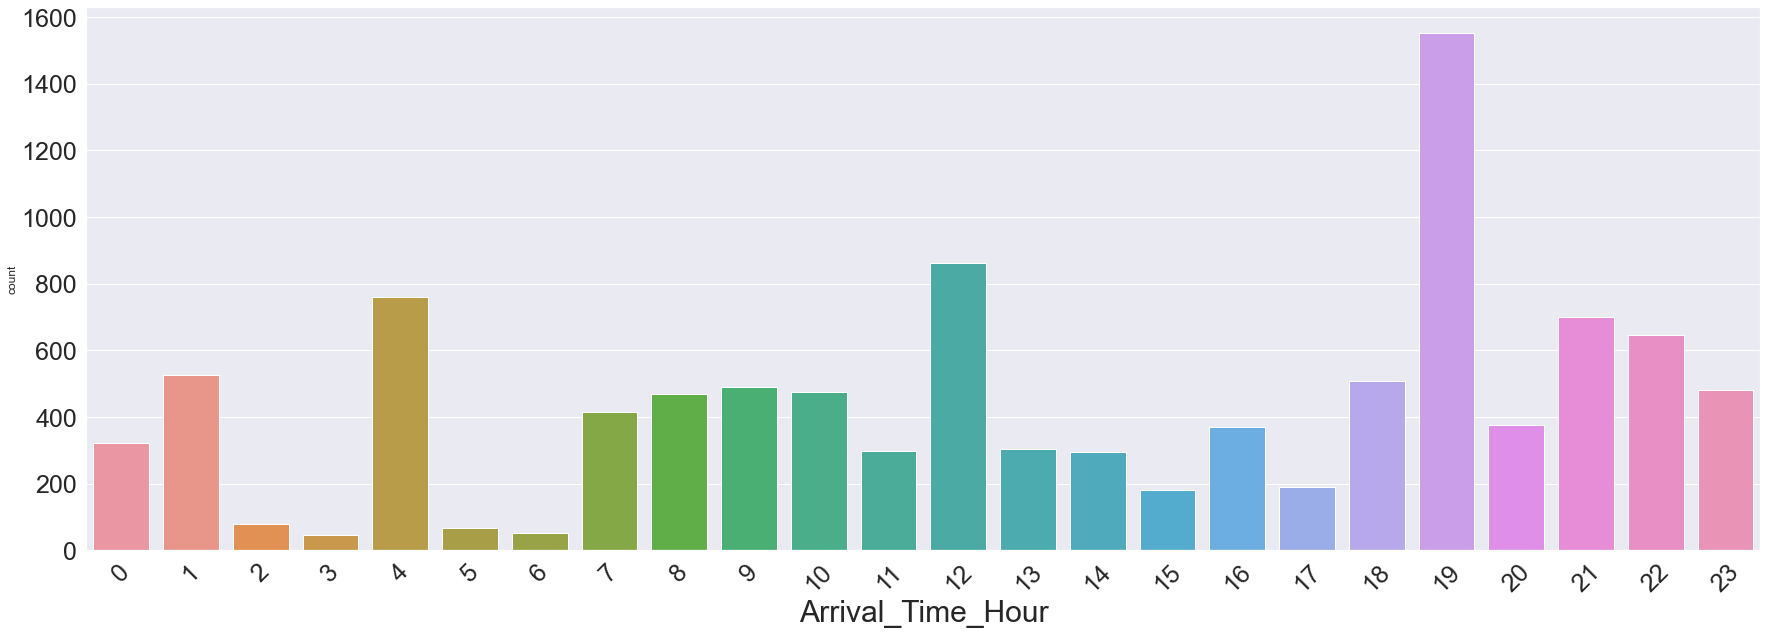

In [ ]:
plt.figure(figsize=(30,10))
plt.xticks(rotation = 45,fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(xlabel = 'Arrival_Time_Hour', fontsize = 30)
sns.countplot(data['Arrival_Time_Hour'])

<AxesSubplot:xlabel='day', ylabel='count'>

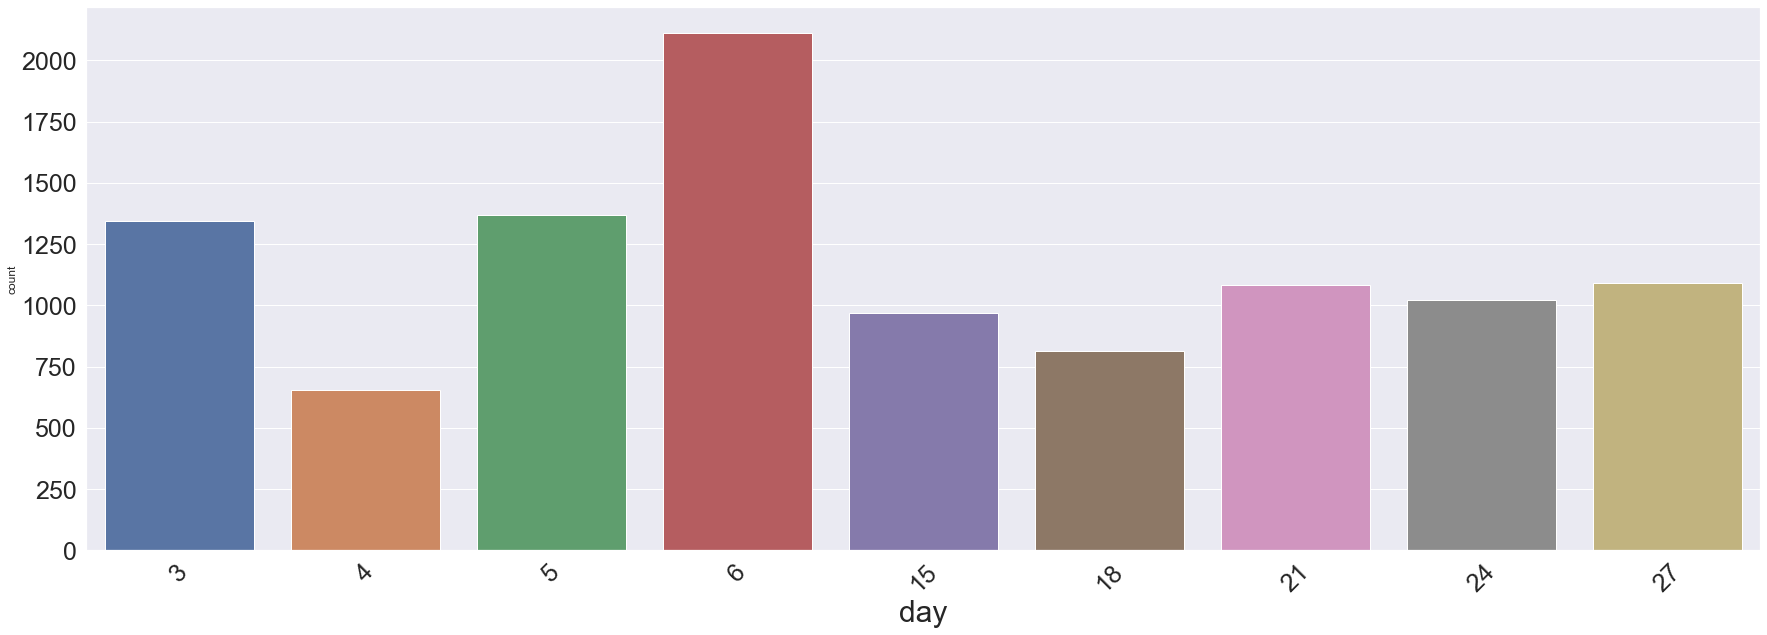

In [ ]:
plt.figure(figsize=(30,10))
plt.xticks(rotation = 45,fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(xlabel = 'day', fontsize = 30)
sns.countplot(data['day'])

<AxesSubplot:xlabel='weekday', ylabel='count'>

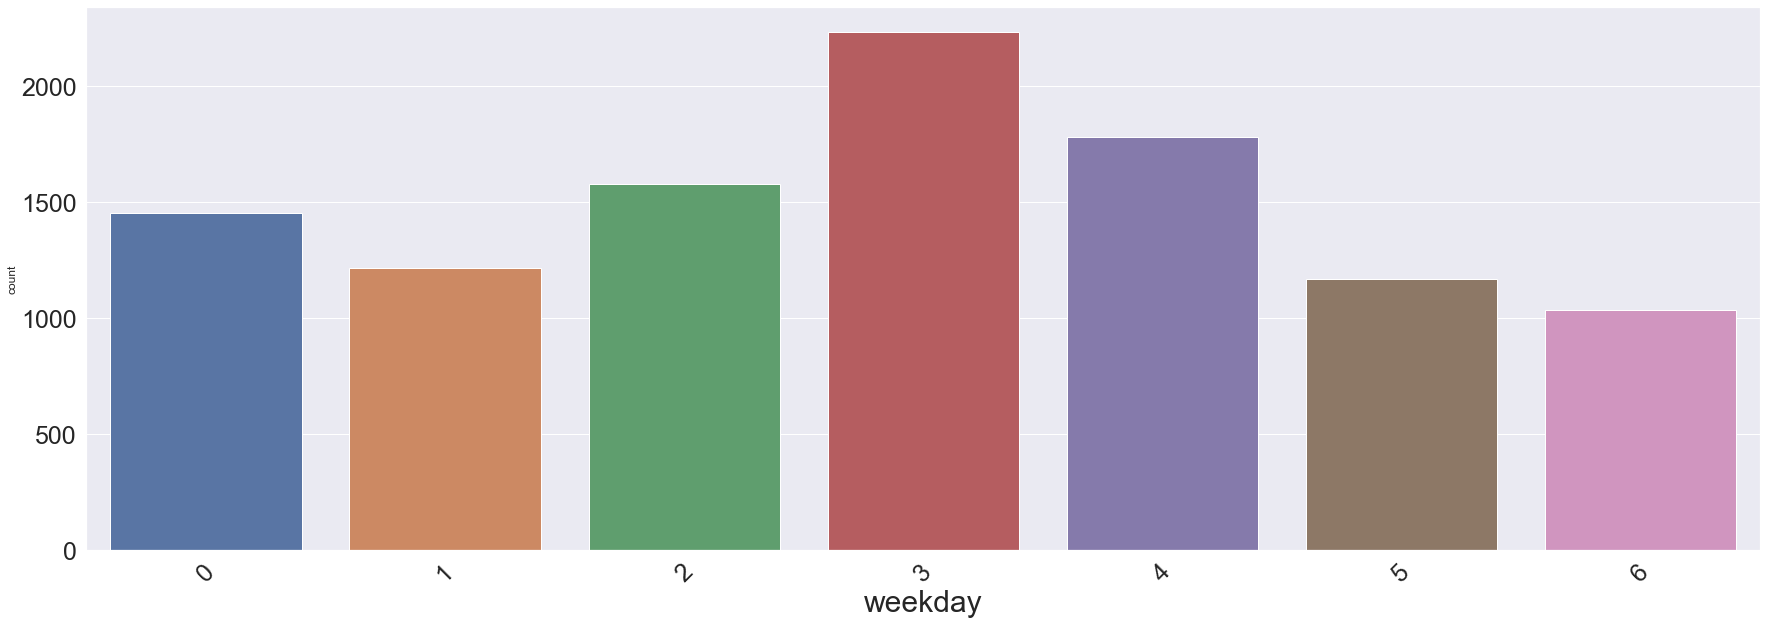

In [ ]:
plt.figure(figsize=(30,10))
plt.xticks(rotation = 45,fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(xlabel = 'weekday', fontsize = 30)
sns.countplot(data['weekday'])
##monday = 0 and sunday == 6
##Thursday has most flights

<AxesSubplot:xlabel='month', ylabel='count'>

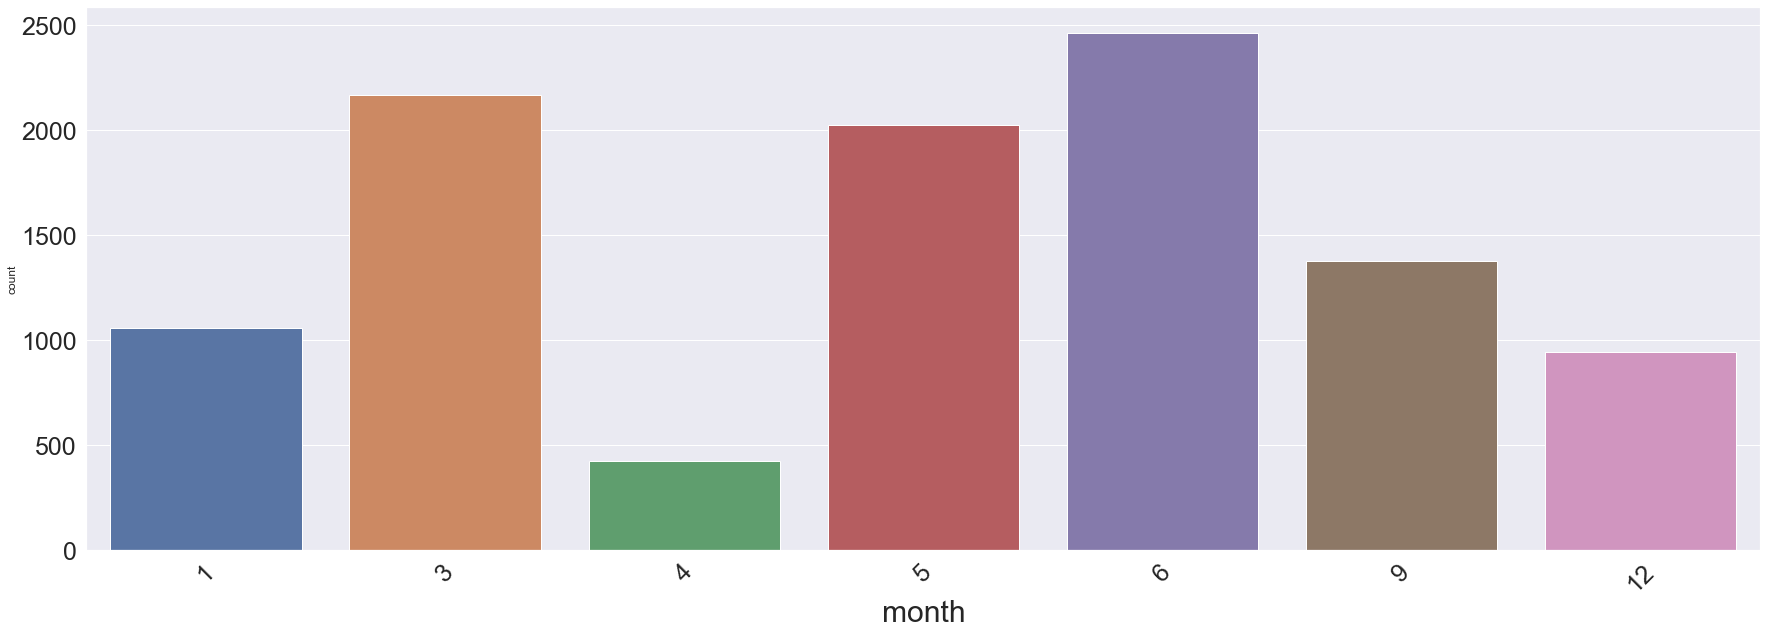

In [ ]:
plt.figure(figsize=(30,10))
plt.xticks(rotation = 45,fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(xlabel = 'month', fontsize = 30)
sns.countplot(data['month'].sort_values())
## most flights are in the month of june

<AxesSubplot:xlabel='Price', ylabel='Count'>

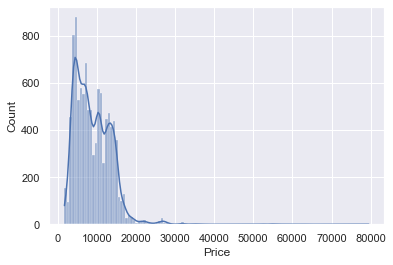

In [ ]:
sns.histplot(data['Price'],kde = True)

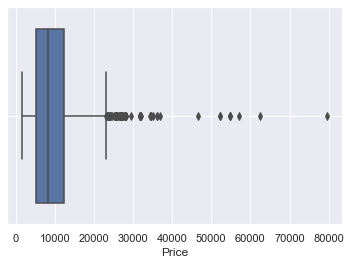

In [ ]:
sns.boxplot(data['Price'])
plt.grid('False')

As we can see that a lot of outliers are present, the graph is also skewed, we can impute median value.

### Outlier Handling

In [ ]:
data[data['Price'] > 40000].shape

(9, 20)

In [ ]:
data['Price'] = np.where(data['Price']>40000,data['Price'].median(),data['Price'])

## INSIGHTS

1- Jet Airways is most frequently used airline.
2- Majority of flights have only one stop.
3- Delhi is the place from where majority of flights depart.
4- Cochin is the destination for most flights.
5- Wednesday, Thursday and Friday has highest numbers of flights.
6- March, May and June has highest number of flights.
7- In the morning between 5am and 10 am, majority flights take off.
8- In the evening majority of flights land, approximately around 7 pm and 10 pm.
9- Price is mostly below Rs 40,000. Outliers are present in Price column, handled it by imputing the median values for price above Rs 40000.
10- Flights are more in first week of month.

## BIVARIATE ANALYSIS

<AxesSubplot:xlabel='Airline', ylabel='Price'>

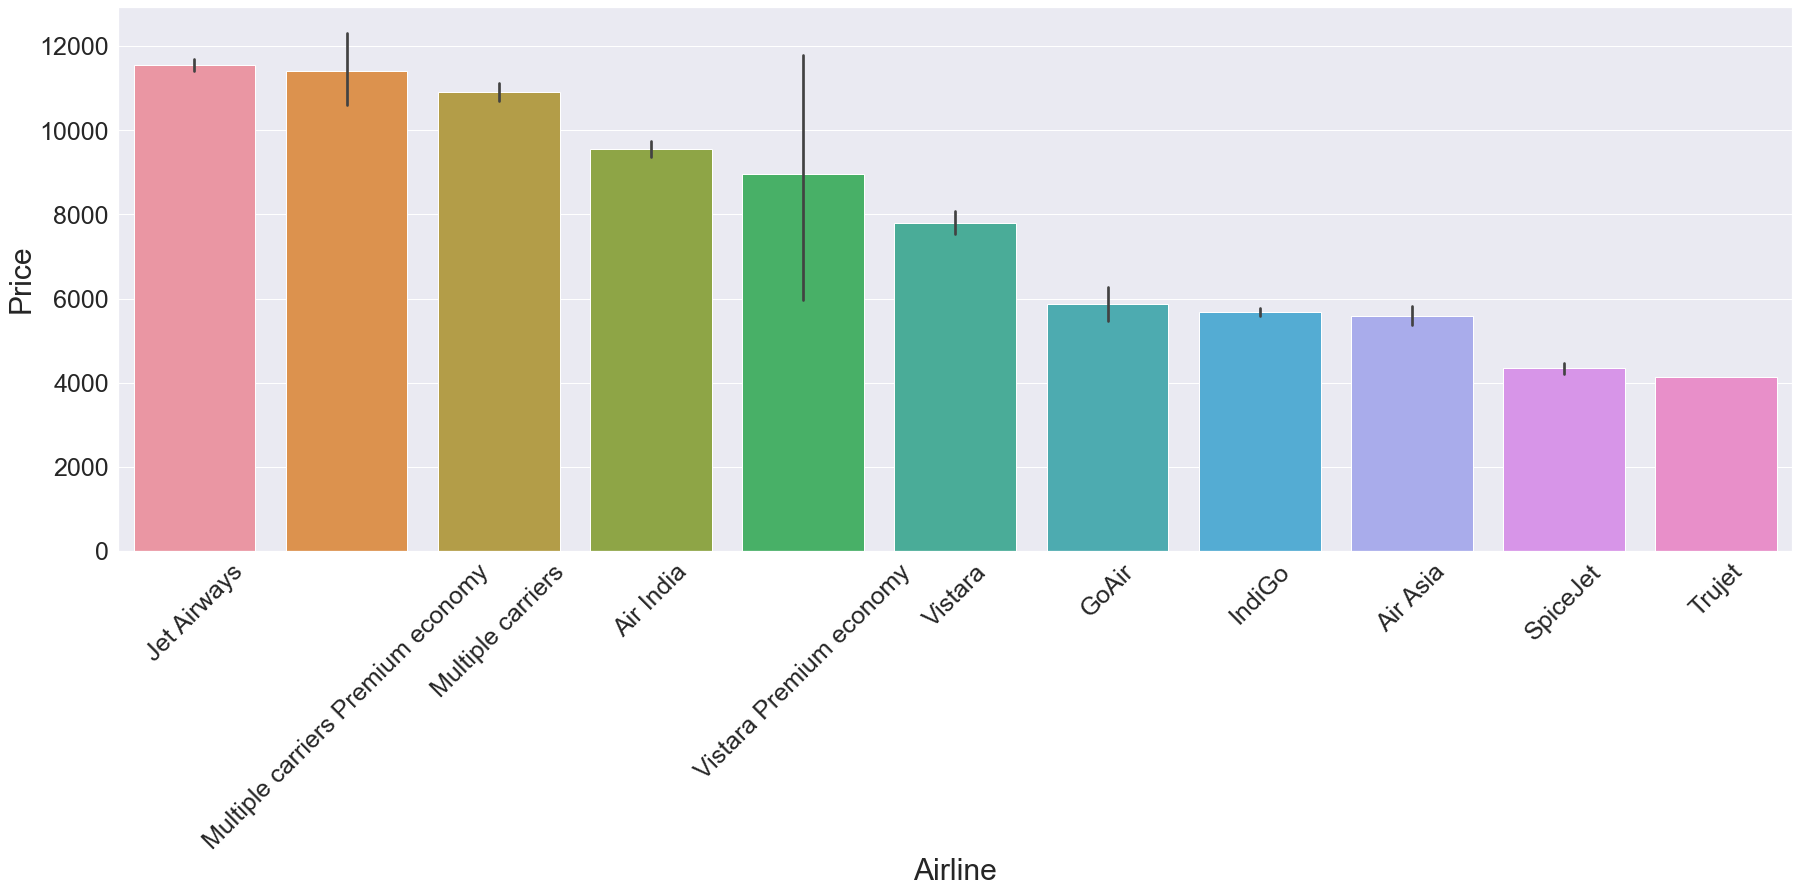

In [ ]:
plt.figure(figsize=(30,10))
plt.xticks(rotation = 45,fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(xlabel = 'Airline', fontsize = 30)
plt.ylabel(ylabel = 'Price',fontsize = 30)
sns.barplot(x=data['Airline'],y= data['Price'],order=data.groupby(["Airline"])['Price'].mean().sort_values(ascending=False).index)

<AxesSubplot:xlabel='Source', ylabel='Price'>

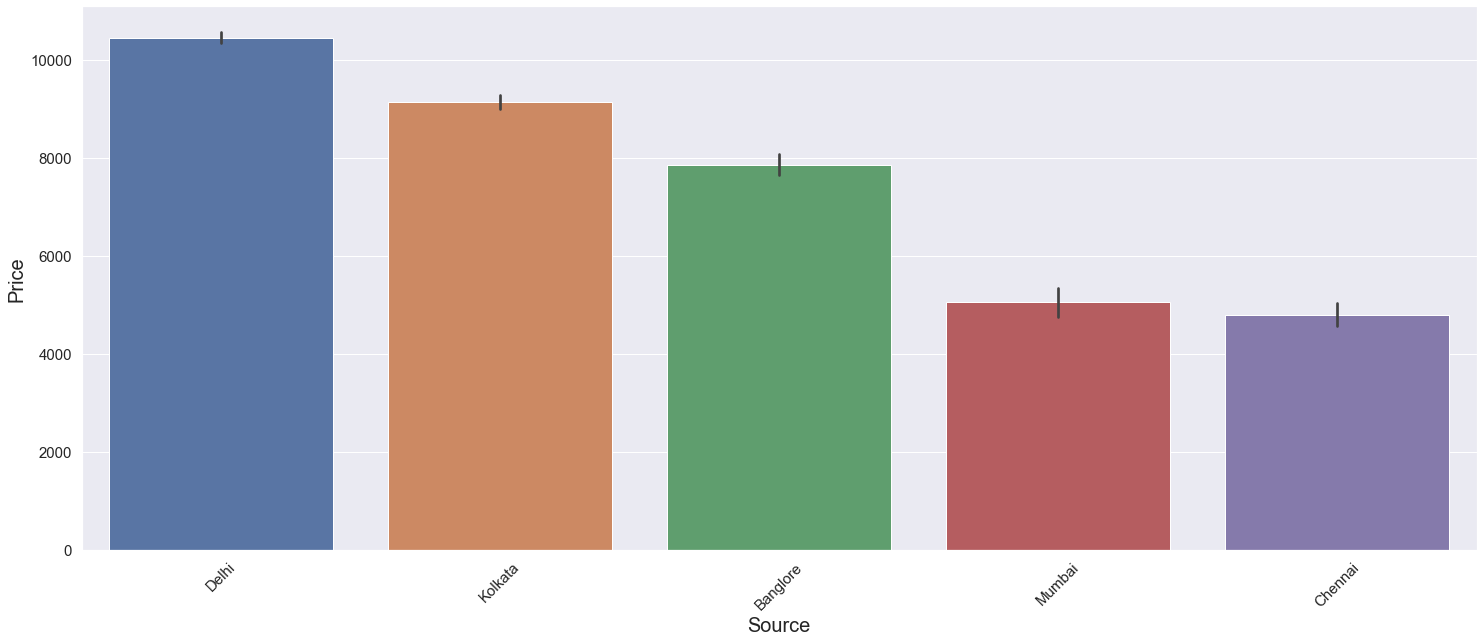

In [ ]:
plt.figure(figsize=(25,10))
plt.xticks(rotation = 45,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(xlabel = 'Source', fontsize = 20)
plt.ylabel(ylabel = 'Price',fontsize = 20)
sns.barplot(x=data['Source'],y= data['Price'],order=data.groupby(["Source"])['Price'].mean().sort_values(ascending=False).index)

<AxesSubplot:xlabel='Destination', ylabel='Price'>

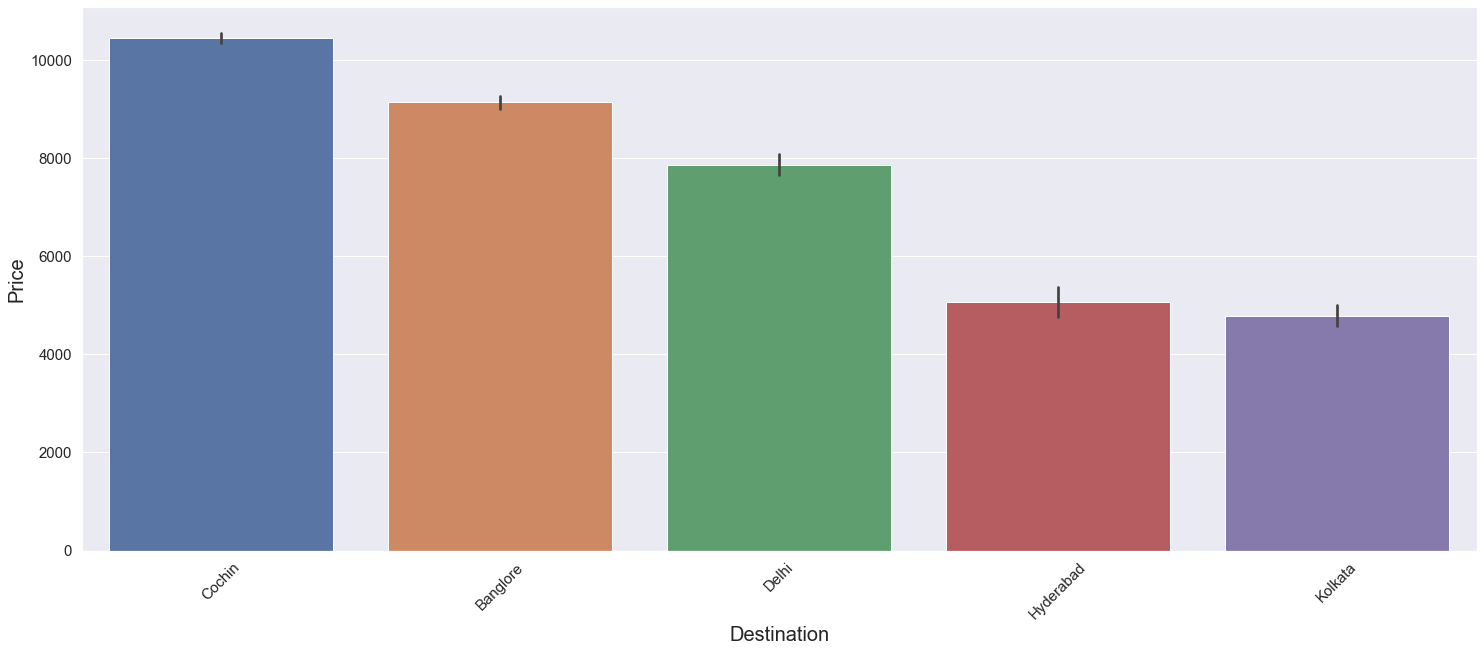

In [ ]:
plt.figure(figsize=(25,10))
plt.xticks(rotation = 45,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(xlabel = 'Destination', fontsize = 20)
plt.ylabel(ylabel = 'Price',fontsize = 20)
sns.barplot(x=data['Destination'],y= data['Price'],order=data.groupby(['Destination'])['Price'].mean().sort_values(ascending=False).index)

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

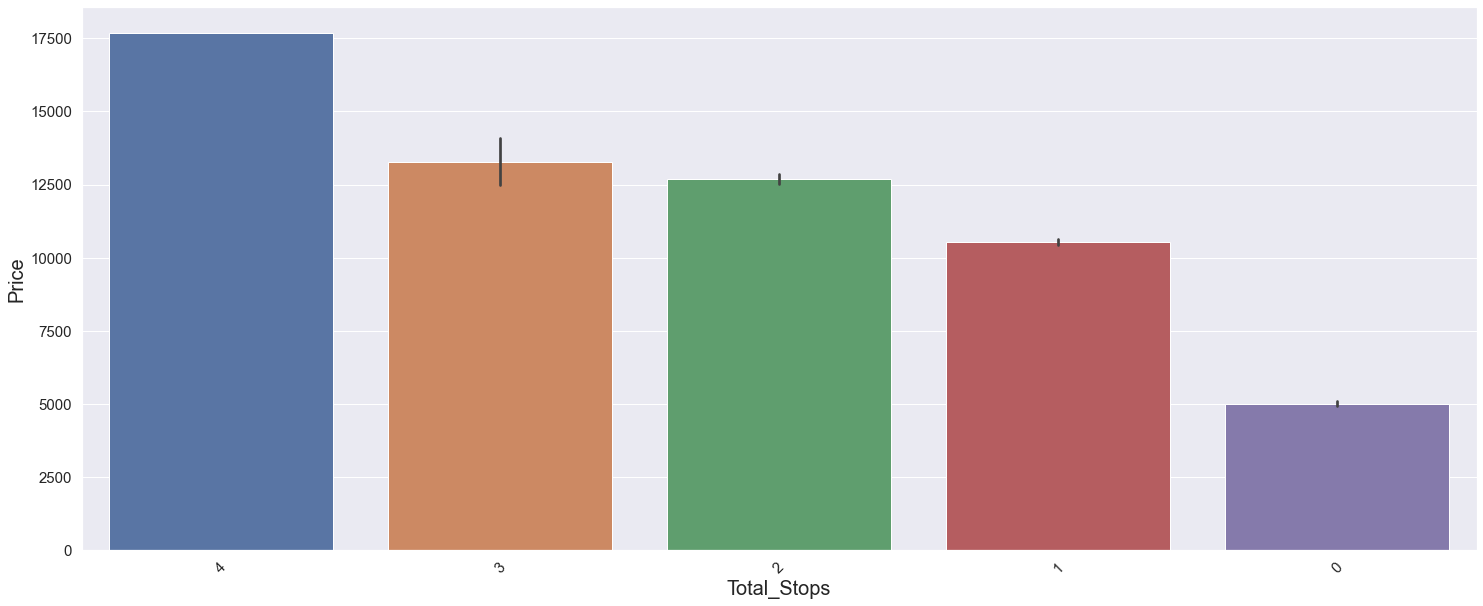

In [ ]:
plt.figure(figsize=(25,10))
plt.xticks(rotation = 45,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(xlabel = 'Total_Stops', fontsize = 20)
plt.ylabel(ylabel = 'Price',fontsize = 20)
sns.barplot(x=data['Total_Stops'],y= data['Price'],order=data.groupby(['Total_Stops'])['Price'].mean().sort_values(ascending=False).index)

<AxesSubplot:xlabel='Airline', ylabel='Duration_Total_Hour'>

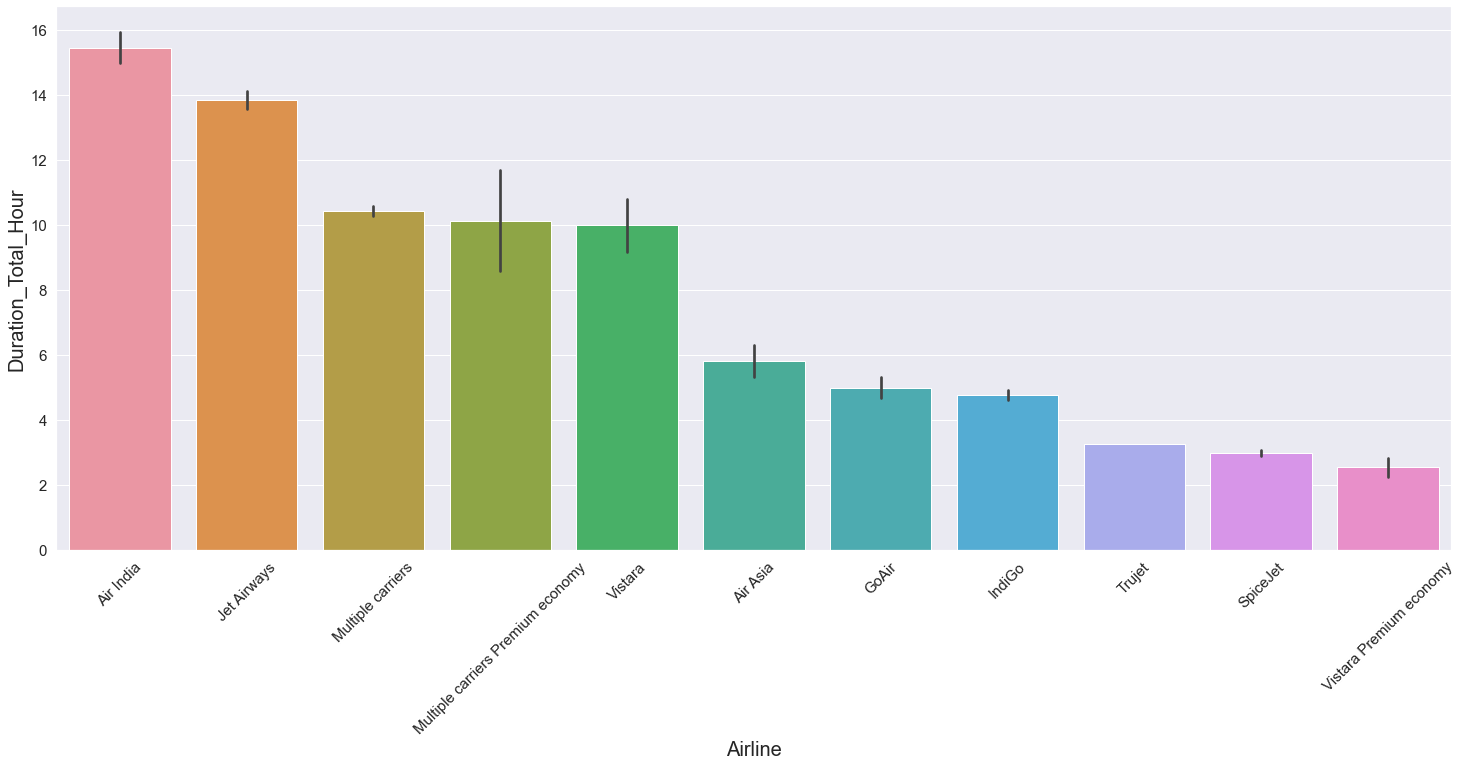

In [ ]:
plt.figure(figsize=(25,10))
plt.xticks(rotation = 45,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(xlabel = 'Airline', fontsize = 20)
plt.ylabel(ylabel = 'Duration_Total_Hour',fontsize = 20)
sns.barplot(x=data['Airline'],y= data['Duration_Total_Hour'],order=data.groupby(['Airline'])['Duration_Total_Hour'].mean().sort_values(ascending=False).index)

<AxesSubplot:xlabel='Duration_Total_Hour', ylabel='Price'>

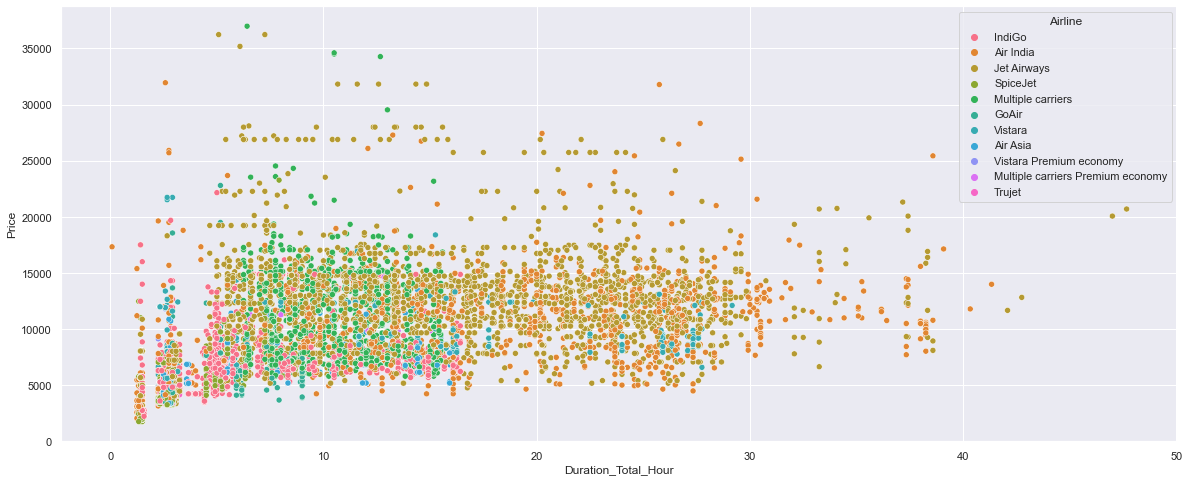

In [ ]:
plt.figure(figsize=(20,8))
sns.scatterplot(x=data['Duration_Total_Hour'],y=data['Price'],hue=data['Airline'])

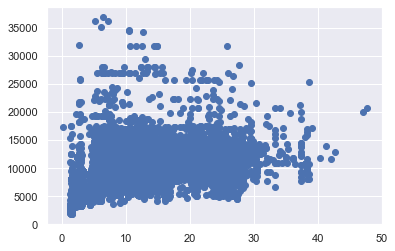

In [ ]:
plt.scatter(data['Duration_Total_Hour'],data['Price'])

<AxesSubplot:xlabel='Dep_Time_Hour', ylabel='Price'>

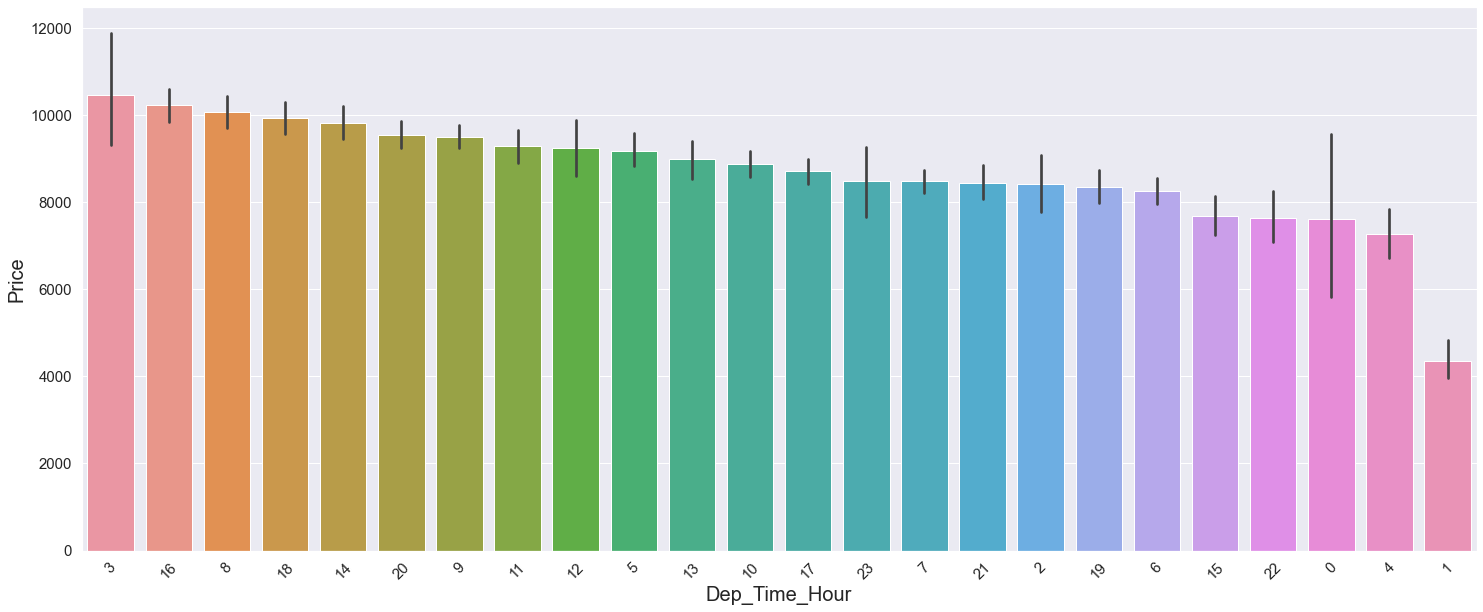

In [ ]:
plt.figure(figsize=(25,10))
plt.xticks(rotation = 45,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(xlabel = 'Dep_Time_Hour', fontsize = 20)
plt.ylabel(ylabel = 'Price',fontsize = 20)
sns.barplot(x=data['Dep_Time_Hour'],y= data['Price'],order=data.groupby(['Dep_Time_Hour'])['Price'].mean().sort_values(ascending=False).index) 

<AxesSubplot:xlabel='Arrival_Time_Hour', ylabel='Price'>

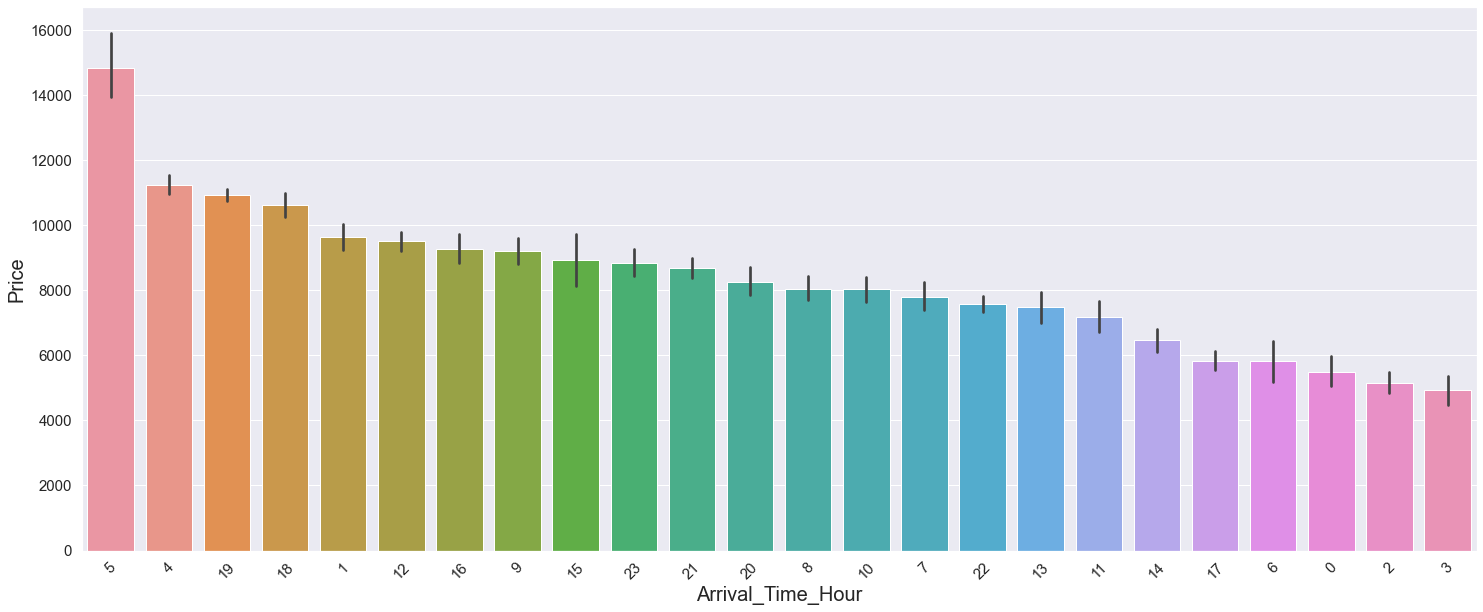

In [ ]:
plt.figure(figsize=(25,10))
plt.xticks(rotation = 45,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(xlabel = 'Arrival_Time_Hour', fontsize = 20)
plt.ylabel(ylabel = 'Price',fontsize = 20)
sns.barplot(x=data['Arrival_Time_Hour'],y= data['Price'],order=data.groupby(['Arrival_Time_Hour'])['Price'].mean().sort_values(ascending=False).index) 

In [ ]:
#sns.pairplot(data,kind='reg')

In [ ]:
## ASSIGNMENT

In [ ]:
## assignment
df1 = data.groupby('Source').count()

In [ ]:
df1

Airline  Date_of_Journey  Destination  Route  Dep_Time  \
Source                                                             
Banglore     2179             2179         2179   2179      2179   
Chennai       381              381          381    381       381   
Delhi        4345             4345         4345   4345      4345   
Kolkata      2860             2860         2860   2860      2860   
Mumbai        697              697          697    697       697   

          Arrival_Time  Duration  Total_Stops  Additional_Info  Price   day  \
Source                                                                        
Banglore          2179      2179         2179             2179   2179  2179   
Chennai            381       381          381              381    381   381   
Delhi             4345      4345         4345             4345   4345  4345   
Kolkata           2860      2860         2860             2860   2860  2860   
Mumbai             697       697          697              697    697   697   

          month  year  weekday  Arrival_Time_Hour  Arrival_Time_Minutes  \
Source                                                                    
Banglore   2179  2179     2179               2179                  2179   
Chennai     381   381      381                381                   381   
Delhi      4345  4345     4345               4345                  4345   
Kolkata    2860  2860     2860               2860                  2860   
Mumbai      697   697      697                697                   697   

          Dep_Time_Hour  Dep_Time_Minute  Duration_Total_Hour  
Source                                                         
Banglore           2179             2179                 2179  
Chennai             381              381                  381  
Delhi              4345             4345                 4345  
Kolkata            2860             2860                 2860  
Mumbai              697              697                  697

<AxesSubplot:ylabel='Airline'>

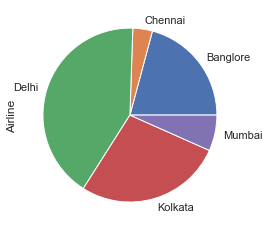

In [ ]:
df1['Airline'].plot(kind = 'pie')

## INSIGHTS

1- Jet Airways has average price higher than other airlines.
2- Delhi has highest average price.
3- Cochin has highest arrival price.
4- Number of Stops is directly proportional to price.
5- As the Departure time increases, the price of flight decreases.
6- As the Arrival time increases, the price of flight decreases.

## Multicollinearity

<AxesSubplot:>

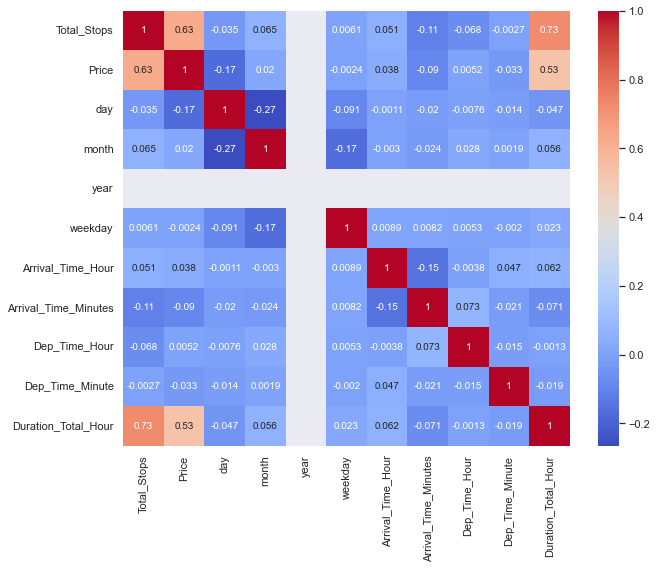

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot = True, cmap = 'coolwarm')

Duration_Total_Hours and Total Stops are highly correlated, we can drop either one.

In [ ]:
data_model.drop('Route',axis = 1, inplace = True)

In [ ]:
data_model

Total_Stops  Price  day  month  weekday  Arrival_Time_Hour  \
0                0   3897   24      3        6                  1   
1                2   7662    5      1        5                 13   
2                2  13882    6      9        4                  4   
3                1   6218    5     12        3                 23   
4                1  13302    3      1        3                 21   
...            ...    ...  ...    ...      ...                ...   
10678            0   4107    4      9        2                 22   
10679            0   4145   27      4        5                 23   
10680            0   7229   27      4        5                 11   
10681            0  12648    3      1        3                 14   
10682            2  11753    5      9        3                 19   

       Arrival_Time_Minutes  Dep_Time_Hour  Dep_Time_Minute  \
0                        10             22               20   
1                        15              5               50   
2                        25              9               25   
3                        30             18                5   
4                        35             16               50   
...                     ...            ...              ...   
10678                    25             19               55   
10679                    20             20               45   
10680                    20              8               20   
10681                    10             11               30   
10682                    15             10               55   

       Duration_Total_Hour  Airline_Air Asia  Airline_Air India  \
0                 2.833333                 0                  0   
1                 7.416667                 0                  1   
2                19.000000                 0                  0   
3                 5.416667                 0                  0   
4                 4.750000                 0                  0   
...                    ...               ...                ...   
10678             2.500000                 1                  0   
10679             2.583333                 0                  1   
10680             3.000000                 0                  0   
10681             2.666667                 0                  0   
10682             8.333333                 0                  1   

       Airline_GoAir  Airline_IndiGo  Airline_Jet Airways  \
0                  0               1                    0   
1                  0               0                    0   
2                  0               0                    1   
3                  0               1                    0   
4                  0               1                    0   
...              ...             ...                  ...   
10678              0               0                    0   
10679              0               0                    0   
10680              0               0                    1   
10681              0               0                    0   
10682              0               0                    0   

       Airline_Multiple carriers  Airline_Multiple carriers Premium economy  \
0                              0                                          0   
1                              0                                          0   
2                              0                                          0   
3                              0                                          0   
4                              0                                          0   
...                          ...                                        ...   
10678                          0                                          0   
10679                          0                                          0   
10680                          0                                          0   
10681                          0                                          0   
10682         

# TRAIN - TEST SPLIT

In [ ]:
X = data_model.drop('Price',axis = 1)
y = data_model['Price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

## Model Building

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [ ]:
def predict(ml_model):
    
    print('Model name is: {}'.format(ml_model))
    model = ml_model.fit(X_train,y_train)
    print('Training score: {}'.format(model.score(X_train,y_train)))
    predictions = model.predict(X_test)
    
    r2score = r2_score(y_test,predictions)
    print('r2_score is: {}'.format(r2score))
    adj_r2 = 1-(1-r2score)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))
    print('Adjusted R2 score: {}'.format(adj_r2))
    
    print('MAE: {}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE: {}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE: {}'.format(np.sqrt(mean_absolute_error(y_test,predictions))))

In [ ]:
predict(LinearRegression())

Model name is: LinearRegression()
Training score: 0.5442798883475266
r2_score is: 0.5472331847259506
Adjusted R2 score: 0.5406458886744367
MAE: 2114.951443446748
MSE: 9440313.233209116
RMSE: 45.98860123385737


In [ ]:
predict(DecisionTreeRegressor())

Model name is: DecisionTreeRegressor()
Training score: 0.9697961300999993
r2_score is: 0.6590126201495566
Adjusted R2 score: 0.65405160104407
MAE: 1379.5330068482242
MSE: 7109681.111260418
RMSE: 37.142065193634885


In [ ]:
predict(RandomForestRegressor())

Model name is: RandomForestRegressor()
Training score: 0.9500520478576937
r2_score is: 0.8034413636067365
Adjusted R2 score: 0.800581635628173
MAE: 1187.21046066063
MSE: 4098301.8932642564
RMSE: 34.45592054583116


In [ ]:
predict(XGBRegressor())

Model name is: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
Training score: 0.938994227689506
r2_score is: 0.8269134445440087
Adjusted R2 score: 0.8243952114384414
MAE: 1164.6287535017207
MSE: 3608902.518557505
RMSE: 34.126657520210216


## Feature Importance

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
extractor = ExtraTreesRegressor()

In [ ]:
extractor.fit(X_train,y_train)

ExtraTreesRegressor()

In [ ]:
x_columns = X_train.columns

In [ ]:
features_rank = pd.DataFrame({'Features': x_columns,'importance':extractor.feature_importances_})

In [ ]:
features_rank = features_rank.sort_values('importance',ascending = False)

In [ ]:
features_rank

Features  importance
0                                 Total_Stops    0.258473
13                        Airline_Jet Airways    0.139505
8                         Duration_Total_Hour    0.132054
1                                         day    0.097714
2                                       month    0.081003
3                                     weekday    0.040883
7                             Dep_Time_Minute    0.036360
6                               Dep_Time_Hour    0.034502
4                           Arrival_Time_Hour    0.032651
14                  Airline_Multiple carriers    0.028526
5                        Arrival_Time_Minutes    0.027283
12                             Airline_IndiGo    0.018096
27                          Destination_Delhi    0.010882
28                      Destination_Hyderabad    0.009415
20                            Source_Banglore    0.008777
24                              Source_Mumbai    0.007794
10                          Airline_Air India    0.007340
16                           Airline_SpiceJet    0.006281
18                            Airline_Vistara    0.003580
9                            Airline_Air Asia    0.003216
23                             Source_Kolkata    0.003041
26                         Destination_Cochin    0.002735
25                       Destination_Banglore    0.002637
11                              Airline_GoAir    0.002373
22                               Source_Delhi    0.002300
29                        Destination_Kolkata    0.000810
21                             Source_Chennai    0.000738
15  Airline_Multiple carriers Premium economy    0.000727
17                             Airline_Trujet    0.000165
19            Airline_Vistara Premium economy    0.000140

<AxesSubplot:xlabel='importance', ylabel='Features'>

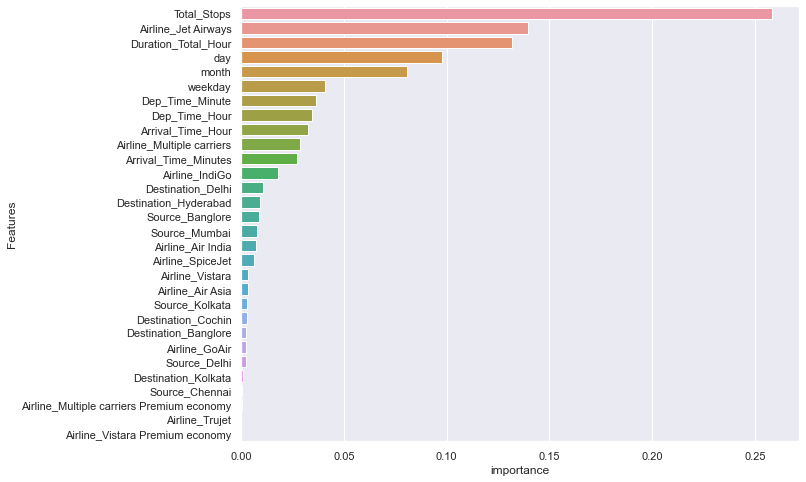

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(y = 'Features', x = 'importance', data = features_rank )

In [ ]:
features_rank['cumsum'] = features_rank['importance'].cumsum()*100

In [ ]:
features_rank.head(15)

Features  importance     cumsum
0                 Total_Stops    0.258473  25.847344
13        Airline_Jet Airways    0.139505  39.797859
8         Duration_Total_Hour    0.132054  53.003238
1                         day    0.097714  62.774654
2                       month    0.081003  70.874934
3                     weekday    0.040883  74.963226
7             Dep_Time_Minute    0.036360  78.599177
6               Dep_Time_Hour    0.034502  82.049396
4           Arrival_Time_Hour    0.032651  85.314518
14  Airline_Multiple carriers    0.028526  88.167074
5        Arrival_Time_Minutes    0.027283  90.895326
12             Airline_IndiGo    0.018096  92.704913
27          Destination_Delhi    0.010882  93.793125
28      Destination_Hyderabad    0.009415  94.734655
20            Source_Banglore    0.008777  95.612346